# Titanic: Logistic Regression

We going to working with the [Titanic Data Set from Kaggle](https://www.kaggle.com/c/titanic). This is a very famous data set and very oftenly used by beginners in ML

This is a classification problem - survival or deceased.

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [31]:
tn = pd.read_csv('titanic_dataset.csv')

In [32]:
tn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [33]:
tn.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


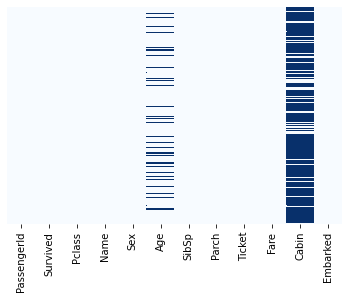

In [34]:
sns.heatmap(tn.isnull(), yticklabels = False, cbar=False, cmap='Blues')

# EDA


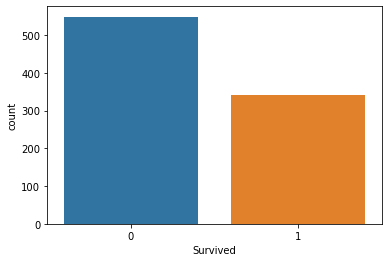

In [35]:
# Lets explore the target data (survived passengers)
sns.countplot(x='Survived', data = tn)

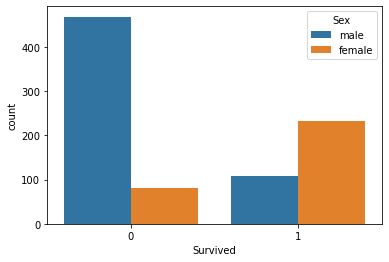

In [36]:
# Survived passengers on basis of heir sex
sns.countplot(x = 'Survived', hue = 'Sex', data = tn)

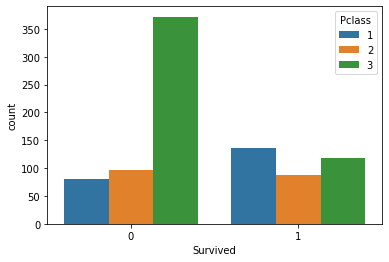

In [37]:
# Survived passengers based on their travel class
sns.countplot(x = 'Survived', hue = 'Pclass', data = tn)

**We can see that the almost 50% passengers survived the accident. Those who died were males compared to female deaths and most of the lower class passengers died in the accident.**

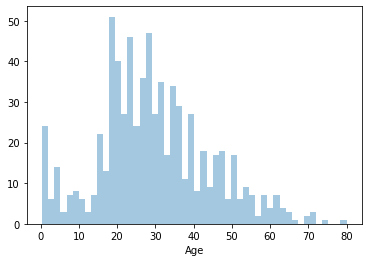

In [38]:
# Let's explore the Age of the passengers.
sns.distplot(tn['Age'], kde = False, bins = 50)

**It's right skewed graph, which means that most of the passengers were young.**

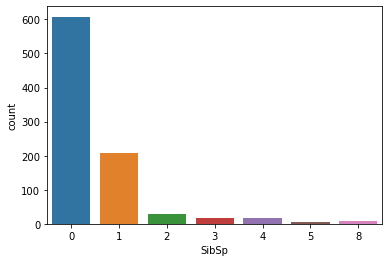

In [39]:
# This will describe the significance of number of siblings
sns.countplot(x = 'SibSp', data = tn )

**Majority of the passengers were travelling single and 1/3 rd were travelling with one siblings. Only a few had more than 2 siblings.**

In [40]:
# Here were are using cufflinks to explore the Fare details.
import cufflinks as cf
cf.go_offline()
tn['Fare'].iplot(kind = 'histogram', bins = 50)

**It can be seen that the histogram is right skewed, which means that most of the passengers were travelling with lowest fares.**

# Data Cleaning

## 1. Missing data imputation

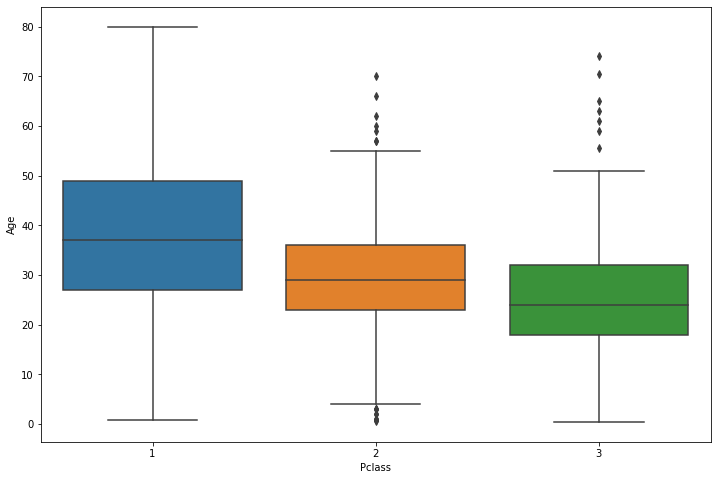

In [41]:
# We are classifying the passengers on the basis of cabin class, so that we can impute the missing age.
# Boxplot is the suitable way to describe the relation between a categorical and numerical value.
plt.figure(figsize=(12,8))
sns.boxplot(x = 'Pclass', y = 'Age', data=tn) 

**For higher class the age ranges from 28 to 50, for 2nd class the age range decreases to a range between 45 and 25. And for cheaper class the age again decreases to a rane between 32 an 18.**

In [42]:
# Function to impute the missing value according yo Pclass

def age_imp(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):
        
        if Pclass == 1:
            return 37
        elif Pclass == 2:
            return 30
        else:
            return 26
    else:
        return Age
        

In [43]:
tn['Age'] = tn[['Age', 'Pclass']].apply(age_imp, axis=1)

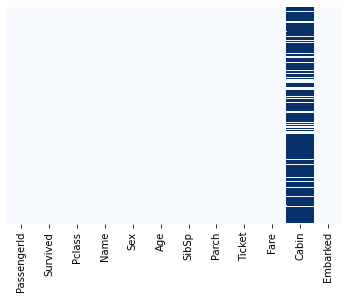

In [44]:
sns.heatmap(tn.isnull(), yticklabels = False, cbar=False, cmap='Blues')

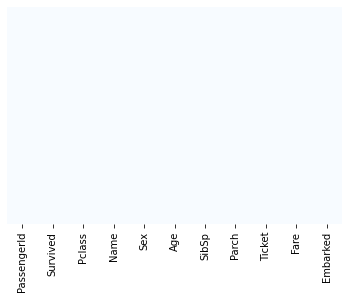

In [45]:
tn.drop('Cabin', axis =1, inplace=True)
sns.heatmap(tn.isnull(), yticklabels = False, cbar=False, cmap='Blues')

## 2. Dummy variable format

**This is done to convert the descrete string variables into numerical values. We need to convert categorical features to dummy variables using pandas! Otherwise our machine learning algorithm won't be able to directly take in those features as inputs.**

In [46]:
sex = pd.get_dummies(tn['Sex'], drop_first=True)
sex

,male
0,1
1,0
2,0
3,0
4,1
...,...
886,1
887,0
888,0
889,1


In [47]:
emb = pd.get_dummies(tn['Embarked'], drop_first=True)
emb

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1
...,...,...
886,0,1
887,0,1
888,0,1
889,0,0


**We have transformed the two categorical descrete variables into descrete numerical values. Next we  will concatinate the dataframes into our train data.(If we need we can transform the Pclass to categrical values 0 and 1's instead of 1,2 and 3. This may effect the ML model.)**

In [48]:
tn = pd.concat([tn,sex,emb],axis=1)
tn

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,0,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S,1,0,1
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S,0,0,1
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,26.0,1,2,W./C. 6607,23.4500,S,0,0,1
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C,1,0,0


## 3. Drop unnecessary columns 

In [49]:
tn.drop(axis=1, columns=['PassengerId', 'Name', 'Sex', 'Ticket', 'Embarked'],inplace = True)
tn.reset_index(drop = True, inplace = True)

We have dropped the unnecesary colums now let's have a look at the cleaned data, before going to model training.

In [50]:
tn.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1


# Model Building
**Nect step is build a logistic regression model.**
## 1. Split data

In [51]:
X = tn.drop(axis = 1, columns=['Survived'])
y = tn['Survived']

In [52]:
# import train test split function from Scikit Learn.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

## 2. Fit

In [63]:
from sklearn.linear_model import LogisticRegression
log = LogisticRegression(solver='lbfgs', max_iter=10000)
log.fit(X_train, y_train)

LogisticRegression(max_iter=10000)

## 3. Prediction

In [64]:
prediction = log.predict(X_test)

## 4. Evaluation

In [65]:
from sklearn.metrics import classification_report
print(classification_report(y_test, prediction))

              precision    recall  f1-score   support

           0       0.78      0.88      0.83       154
           1       0.80      0.67      0.73       114

    accuracy                           0.79       268
   macro avg       0.79      0.77      0.78       268
weighted avg       0.79      0.79      0.78       268



**Alternative method by importing confusion matriix:**

In [66]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, prediction))

[[135  19]
 [ 38  76]]


# END!